# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Berikut adalah penjelasan setiap kolom dalam dataset:

1. **carat**: Berat berlian dalam satuan karat (ct). Ini adalah salah satu faktor utama yang mempengaruhi harga berlian.
2. **cut**: Kualitas potongan berlian, yang dapat mempengaruhi bagaimana cahaya dipantulkan oleh berlian. Kategori potongan bisa termasuk Ideal, Premium, Very Good, Good, atau Fair.
3. **color**: Warna berlian, yang sering diukur pada skala dari D (tidak berwarna) hingga Z (lebih kuning atau coklat).
4. **clarity**: Kualitas kejernihan berlian, diukur berdasarkan keberadaan inklusi atau cacat. Kategori ini termasuk FL (Flawless), IF (Internally Flawless), hingga SI2 (Slightly Included).
5. **depth**: Kedalaman berlian, diukur dalam persentase dari tinggi total berlian dibandingkan dengan diameter rata-rata berlian.
6. **table**: Persentase ukuran permukaan atas berlian dibandingkan dengan diameter totalnya. Ini juga memengaruhi penampilan dan nilai berlian.
7. **price**: Harga berlian dalam dolar.
8. **x, y, z**: Dimensi berlian dalam milimeter (panjang, lebar, dan kedalaman).


[Click disini ke Kaggle](https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices/data).

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler



# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
df = pd.read_csv("/content/drive/MyDrive/diamond/DiamondsPrices.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# **4. Exploratory Data Analysis (EDA)**



Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Struktur Data

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [34]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [35]:
df.describe(include="object")

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [36]:
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [37]:
df.duplicated().sum()

146

## Visualisasi

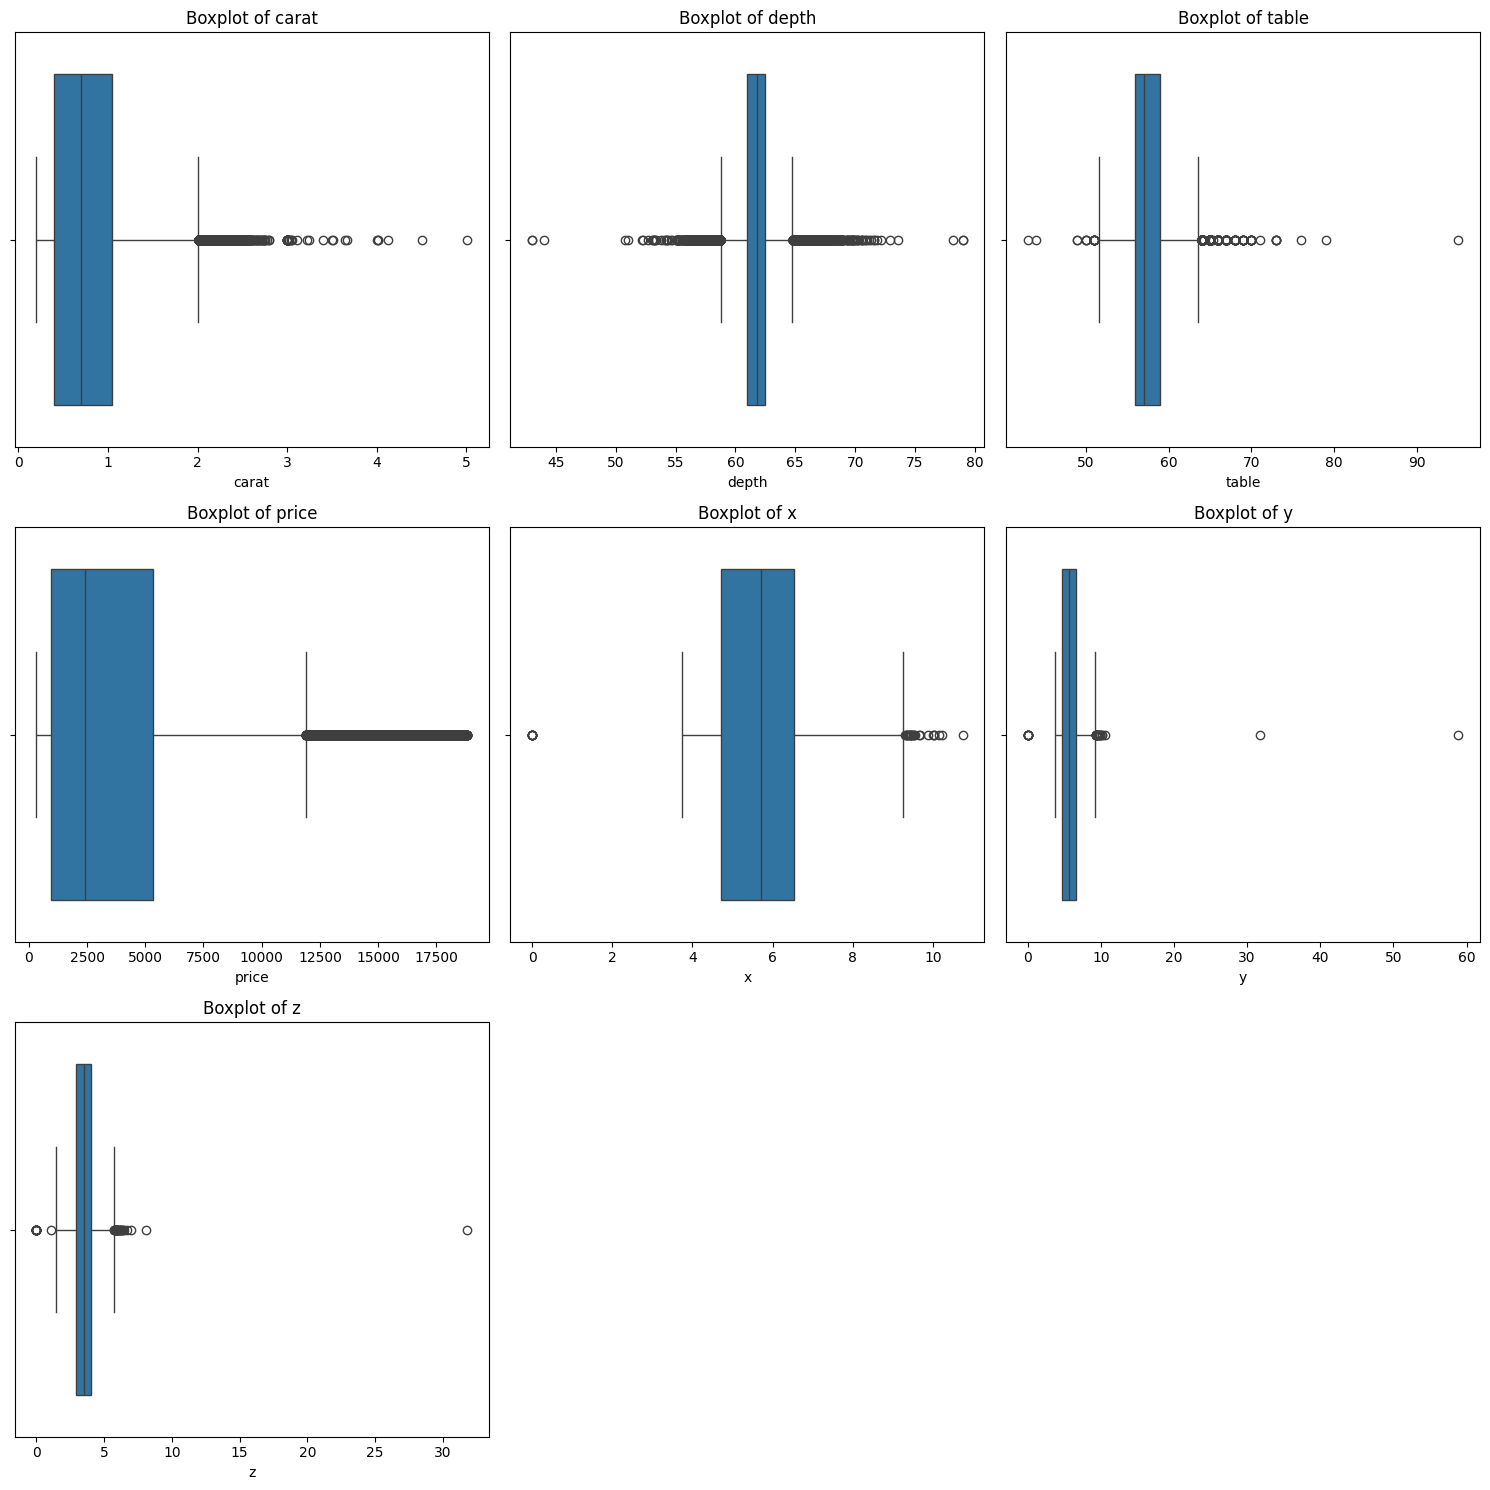

In [38]:
col_num = df.select_dtypes(include=np.number).columns
plot_num = len(col_num)

if plot_num > 0:
    fig, axes = plt.subplots(min(3, plot_num), 3, figsize=(15, 5 * min(3, plot_num)))
    axes = axes.flatten()  # Flatten the axes array for easier iteration
    for i, col in enumerate(col_num):
      if i < len(axes):
          sns.boxplot(x=df[col], ax=axes[i])
          axes[i].set_title(f'Boxplot of {col}')
    # Turn off any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns to plot.")

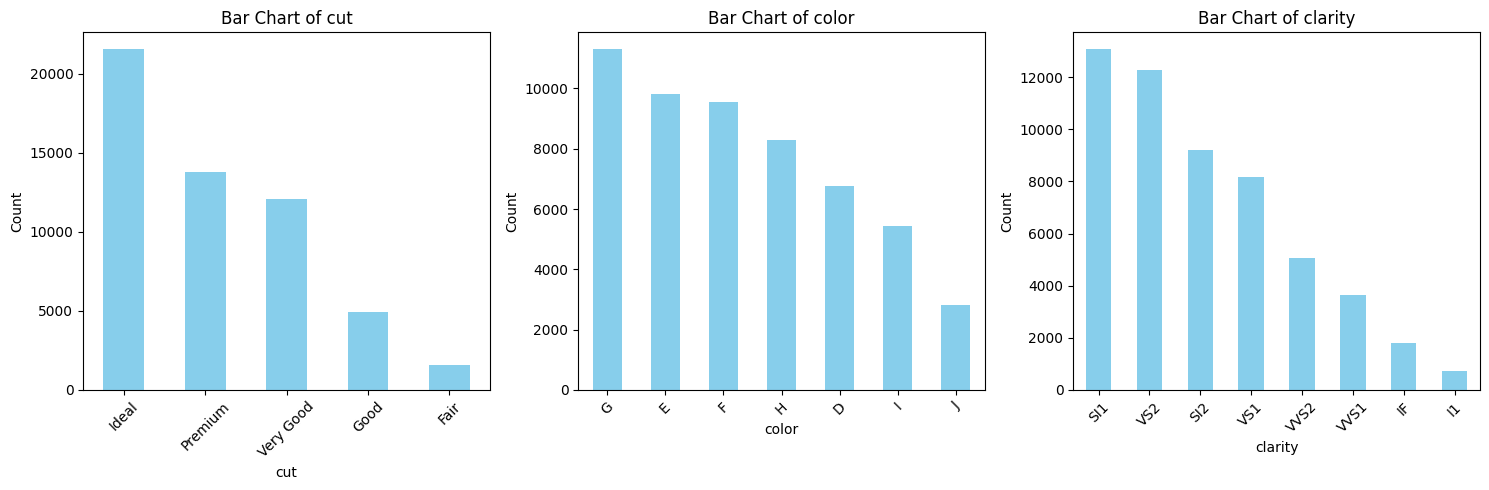

In [39]:
col_cat = df.select_dtypes(include='object').columns
plot_cat = len(col_cat)

if plot_cat > 0:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row with 3 subplots
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    # Iterate through categorical columns and plot
    for i, col in enumerate(col_cat):
        df[col].value_counts().plot(kind='bar', ax=axes[i], color='skyblue')
        axes[i].set_title(f'Bar Chart of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # Turn off any unused subplots
    for j in range(len(col_cat), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()  # Adjust subplot spacing
    plt.show()
else:
    print("No categorical columns ")


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

## Duplicate and Outlier handling

In [40]:
df.drop_duplicates(inplace=True)

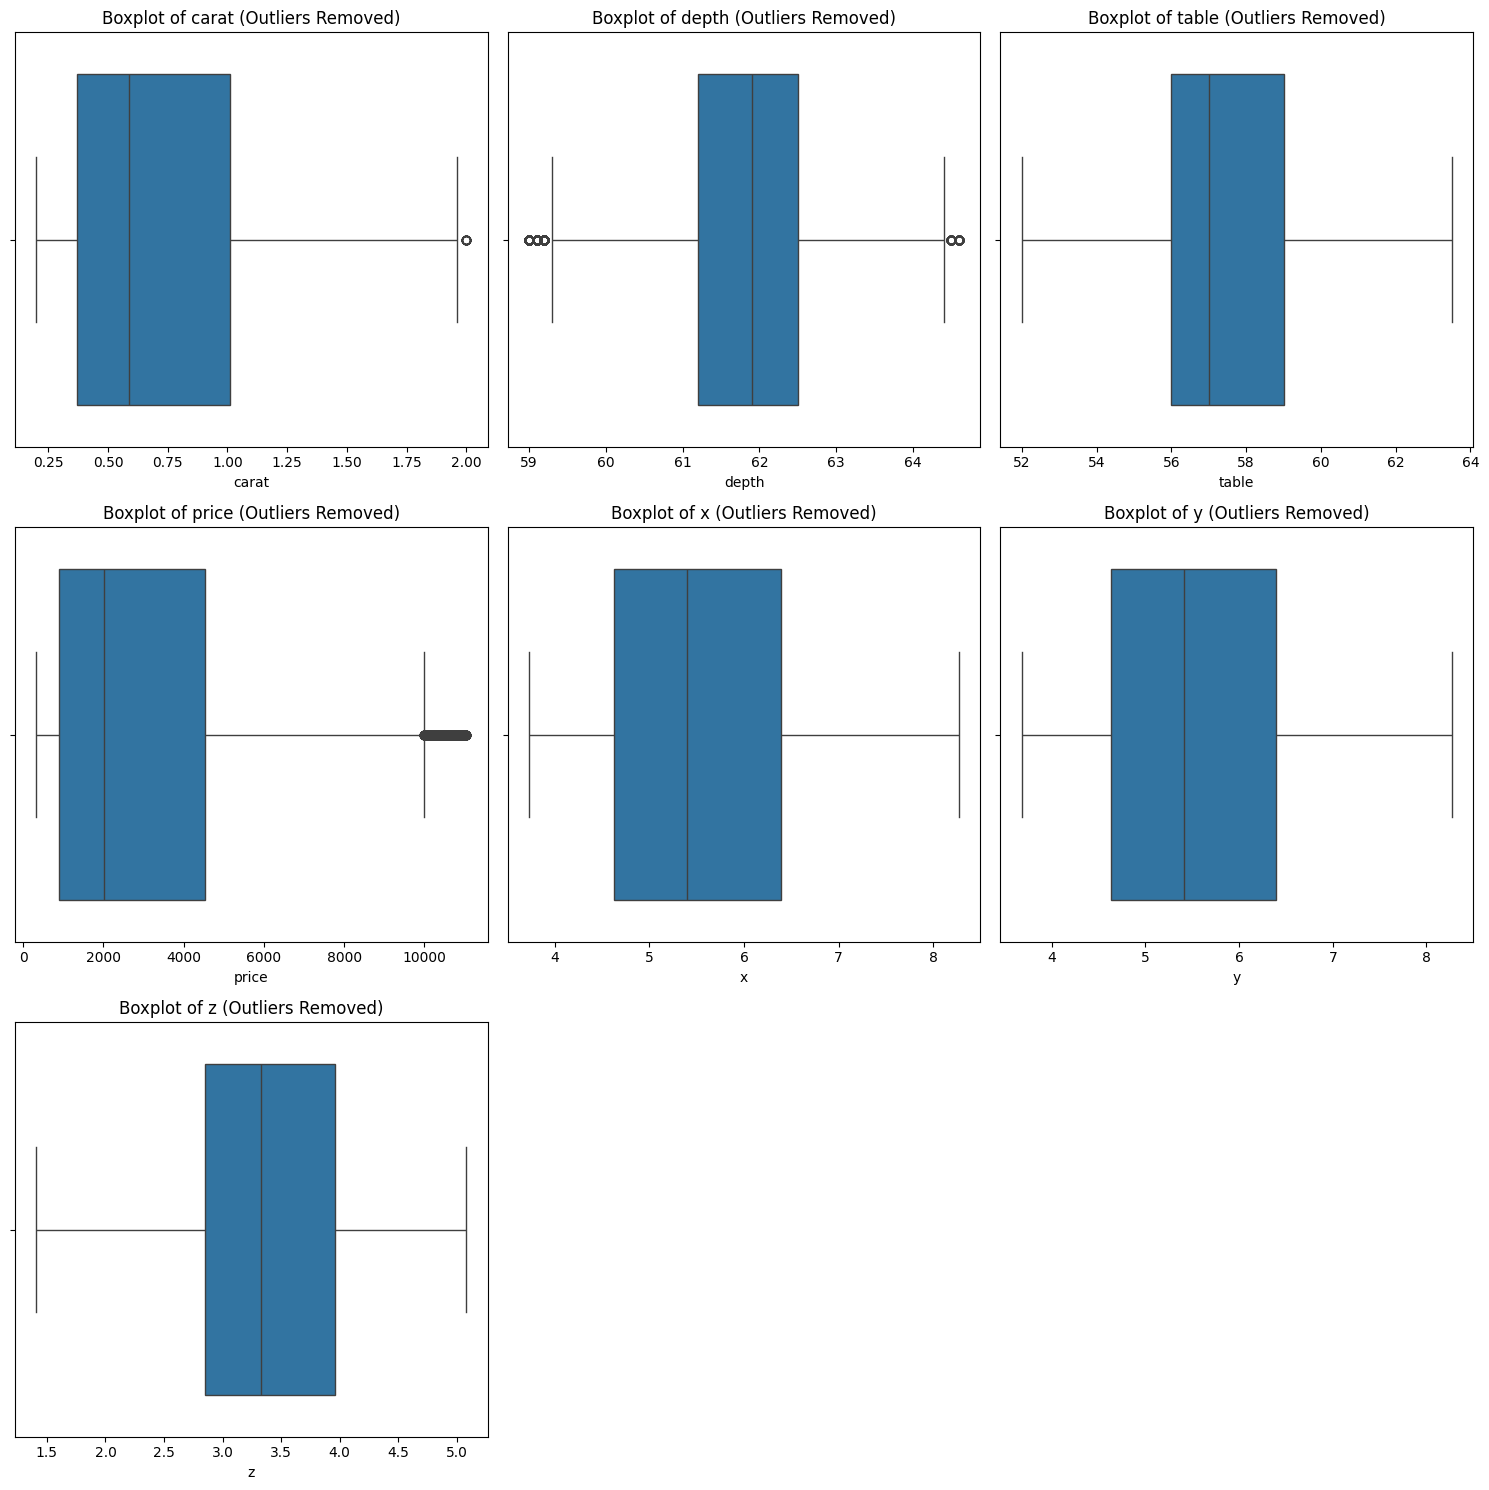

In [41]:

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

col_num = df.select_dtypes(include=np.number).columns
for col in col_num:
    df = remove_outliers(df, col)

# Re-plot the boxplots after outlier removal
plot_num = len(col_num)

if plot_num > 0:
    fig, axes = plt.subplots(min(3, plot_num), 3, figsize=(15, 5 * min(3, plot_num)))
    axes = axes.flatten()
    for i, col in enumerate(col_num):
        if i < len(axes):
            sns.boxplot(x=df[col], ax=axes[i])
            axes[i].set_title(f'Boxplot of {col} (Outliers Removed)')
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns to plot.")


## Encoding

In [42]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [43]:
df_enc=df.copy()
for col in ['cut', 'color', 'clarity']:
    le = LabelEncoder()
    df_enc[col] = le.fit_transform(df_enc[col])
df_enc

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [44]:
df_enc.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


## PCA

Explained Variance Ratio: [0.40388797 0.17405064]
           pca1      pca2  price
0     -0.641792 -0.107807    326
1     -0.593051 -0.278954    326
2     -0.377683  0.503130    334
3     -0.253579  0.657981    335
4     -0.467248  0.733510    336
...         ...       ...    ...
46420 -0.014182 -0.465352   2757
46421 -0.035410 -0.363512   2757
46422  0.026628 -0.544641   2757
46423  0.313698  0.102797   2757
46424 -0.012526 -0.385926   2757

[46425 rows x 3 columns]


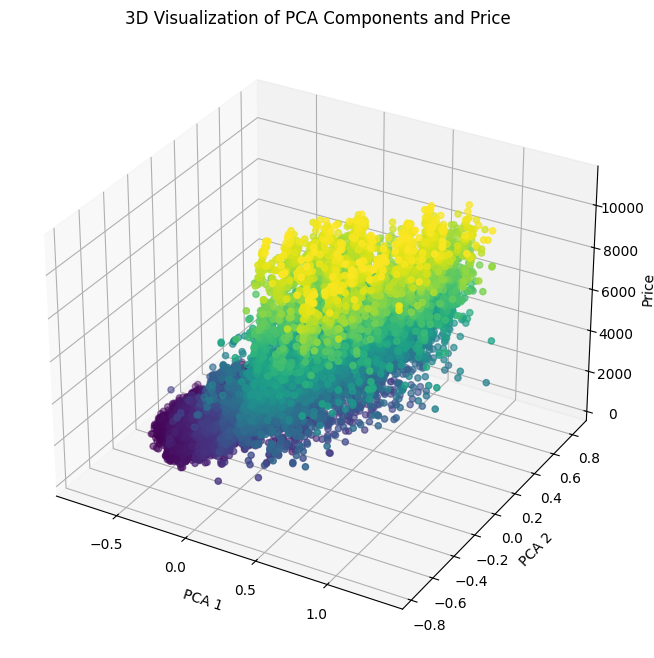

In [45]:

try:
    X = df_enc.drop("price", axis=1)
    y = df_enc['price']

    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(X)

    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_features)

    pca_df = pd.DataFrame(data=pca_result, columns=['pca1', 'pca2'])
    pca_df['price'] = y.reset_index(drop=True)

    print("Explained Variance Ratio:", pca.explained_variance_ratio_)
    print(pca_df)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Assuming you want to visualize 'pca1', 'pca2', and 'price'
    x = pca_df['pca1']
    y = pca_df['pca2']
    z = pca_df['price']

    ax.scatter(x, y, z, c=z, cmap='viridis')  # Color points by 'price'

    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_zlabel('Price')
    ax.set_title('3D Visualization of PCA Components and Price')

    plt.show()

except KeyError as e:
    print(f"Error: Column '{e.args[0]}' not found in DataFrame.")
except Exception as e:
    print(f"An error occurred: {e}")


In [46]:
pca_df.isnull().sum()

,0
pca1,0
pca2,0
price,0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Silhouette Score: 0.4742


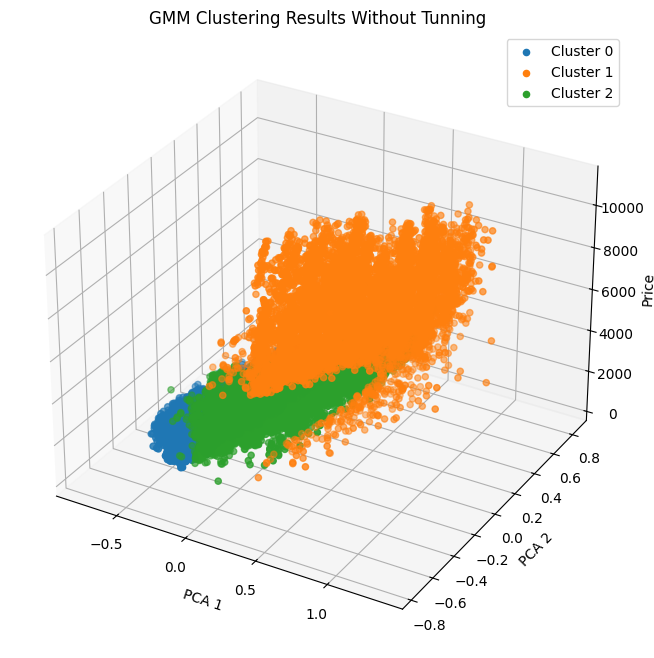

In [47]:
pca_df2 = pca_df.copy()

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=0)  # Example with 3 clusters
gmm.fit(pca_df2[['pca1', 'pca2', 'price']])

# Get cluster labels
labels = gmm.predict(pca_df2[['pca1', 'pca2', 'price']])

# Add cluster labels to the DataFrame
pca_df2['cluster'] = labels

# Calculate silhouette score
silhouette_avg = silhouette_score(pca_df2[['pca1', 'pca2', 'price']], labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Visualize the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(3):
    cluster_data = pca_df2[pca_df2['cluster'] == cluster]
    ax.scatter(cluster_data['pca1'], cluster_data['pca2'], cluster_data['price'], label=f'Cluster {cluster}')

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('Price')
ax.set_title('GMM Clustering Results Without Tunning')
ax.legend()
plt.show()


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

For n_clusters = 2, Silhouette Score = 0.5814
For n_clusters = 3, Silhouette Score = 0.4742
For n_clusters = 4, Silhouette Score = 0.5293
For n_clusters = 5, Silhouette Score = 0.5378
Optimal number of clusters: 2 with silhouette score: 0.5814


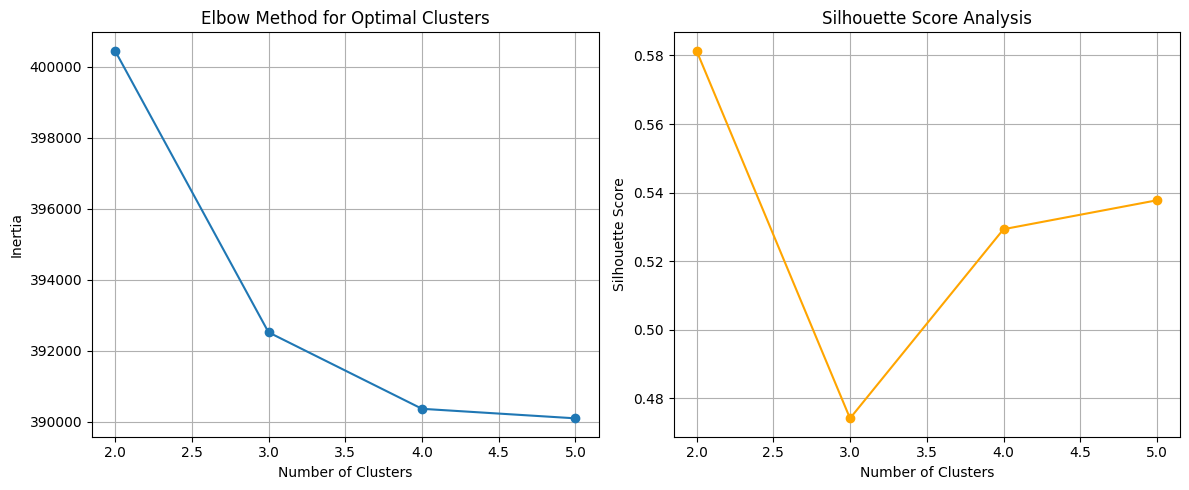

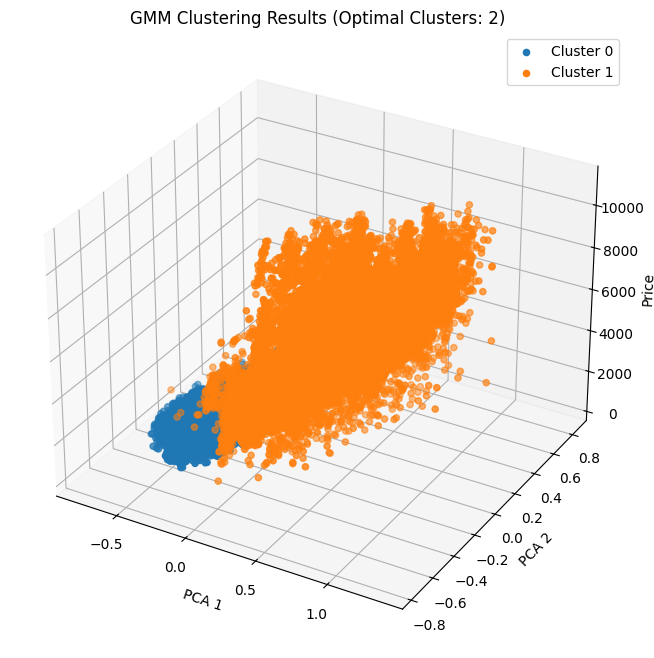

In [48]:
# Create a copy of the dataset
pca_df3 = pca_df.copy()

# Variables to store metrics
n_clusters_range = range(2, 6)  # Testing for clusters from 2 to 5
silhouette_scores = []
inertia_scores = []

# Calculate Silhouette Score and Inertia for each number of clusters
for n_clusters in n_clusters_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    gmm.fit(pca_df3[['pca1', 'pca2', 'price']])
    cluster_labels = gmm.predict(pca_df3[['pca1', 'pca2', 'price']])

    # Silhouette Score
    silhouette_avg = silhouette_score(pca_df3[['pca1', 'pca2', 'price']], cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Inertia (use negative log likelihood as a proxy)
    inertia_scores.append(-gmm.score(pca_df3[['pca1', 'pca2', 'price']]) * len(pca_df3))

    print(f"For n_clusters = {n_clusters}, Silhouette Score = {silhouette_avg:.4f}")

# Find the optimal number of clusters
best_n_clusters = n_clusters_range[silhouette_scores.index(max(silhouette_scores))]
best_score = max(silhouette_scores)

print(f"Optimal number of clusters: {best_n_clusters} with silhouette score: {best_score:.4f}")

# Plot Elbow Method (Inertia)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(n_clusters_range, inertia_scores, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(n_clusters_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Apply GMM with the optimal number of clusters
optimal_gmm = GaussianMixture(n_components=best_n_clusters, random_state=0)
pca_df3['cluster'] = optimal_gmm.fit_predict(pca_df3[['pca1', 'pca2', 'price']])

# Visualize the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(best_n_clusters):
    cluster_data = pca_df3[pca_df3['cluster'] == cluster]
    ax.scatter(cluster_data['pca1'], cluster_data['pca2'], cluster_data['price'], label=f'Cluster {cluster}')

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('Price')
ax.set_title(f'GMM Clustering Results (Optimal Clusters: {best_n_clusters})')
ax.legend()
plt.show()

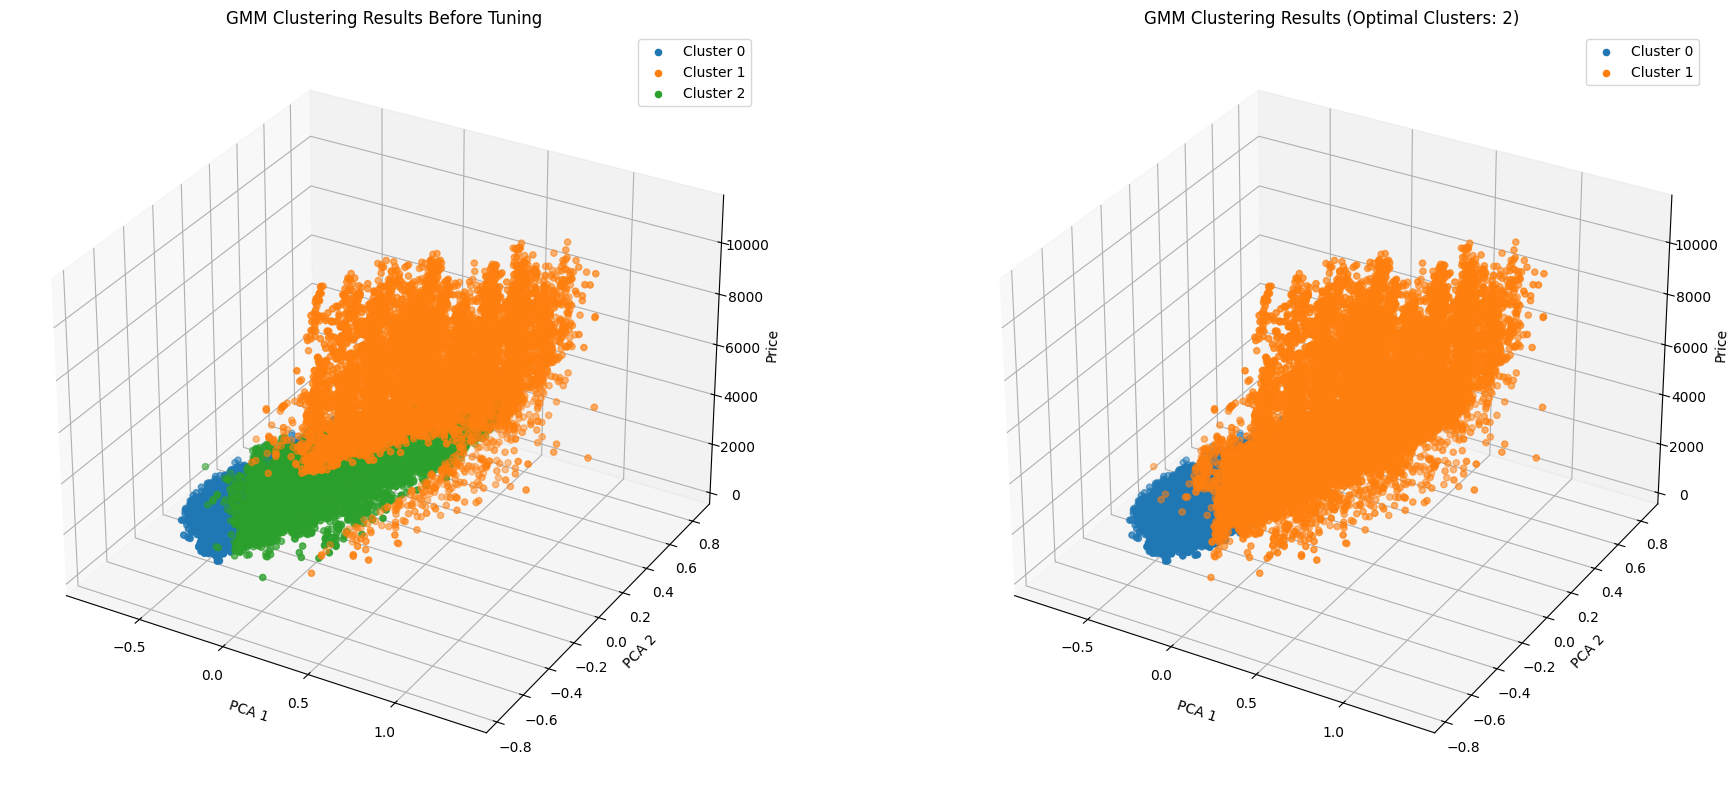

In [49]:
# Visualize pre-tuning and post-tuning clusters in a 1x2 subplot
fig = plt.figure(figsize=(20, 8))

# Pre-tuning clusters (subplot 1)
ax1 = fig.add_subplot(121, projection='3d')

for cluster in range(3):  # Assuming 3 clusters in pre-tuning
    cluster_data = pca_df2[pca_df2['cluster'] == cluster]
    ax1.scatter(cluster_data['pca1'], cluster_data['pca2'], cluster_data['price'], label=f'Cluster {cluster}')

ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
ax1.set_zlabel('Price')
ax1.set_title('GMM Clustering Results Before Tuning')
ax1.legend()

# Post-tuning clusters (subplot 2)
ax2 = fig.add_subplot(122, projection='3d')

for cluster in range(best_n_clusters):
    cluster_data = pca_df3[pca_df3['cluster'] == cluster]
    ax2.scatter(cluster_data['pca1'], cluster_data['pca2'], cluster_data['price'], label=f'Cluster {cluster}')

ax2.set_xlabel('PCA 1')
ax2.set_ylabel('PCA 2')
ax2.set_zlabel('Price')
ax2.set_title(f'GMM Clustering Results (Optimal Clusters: {best_n_clusters})')
ax2.legend()

plt.tight_layout()
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [50]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [56]:
df = pd.merge(df, pca_df3[['cluster']], left_index=True, right_index=True, how='left')

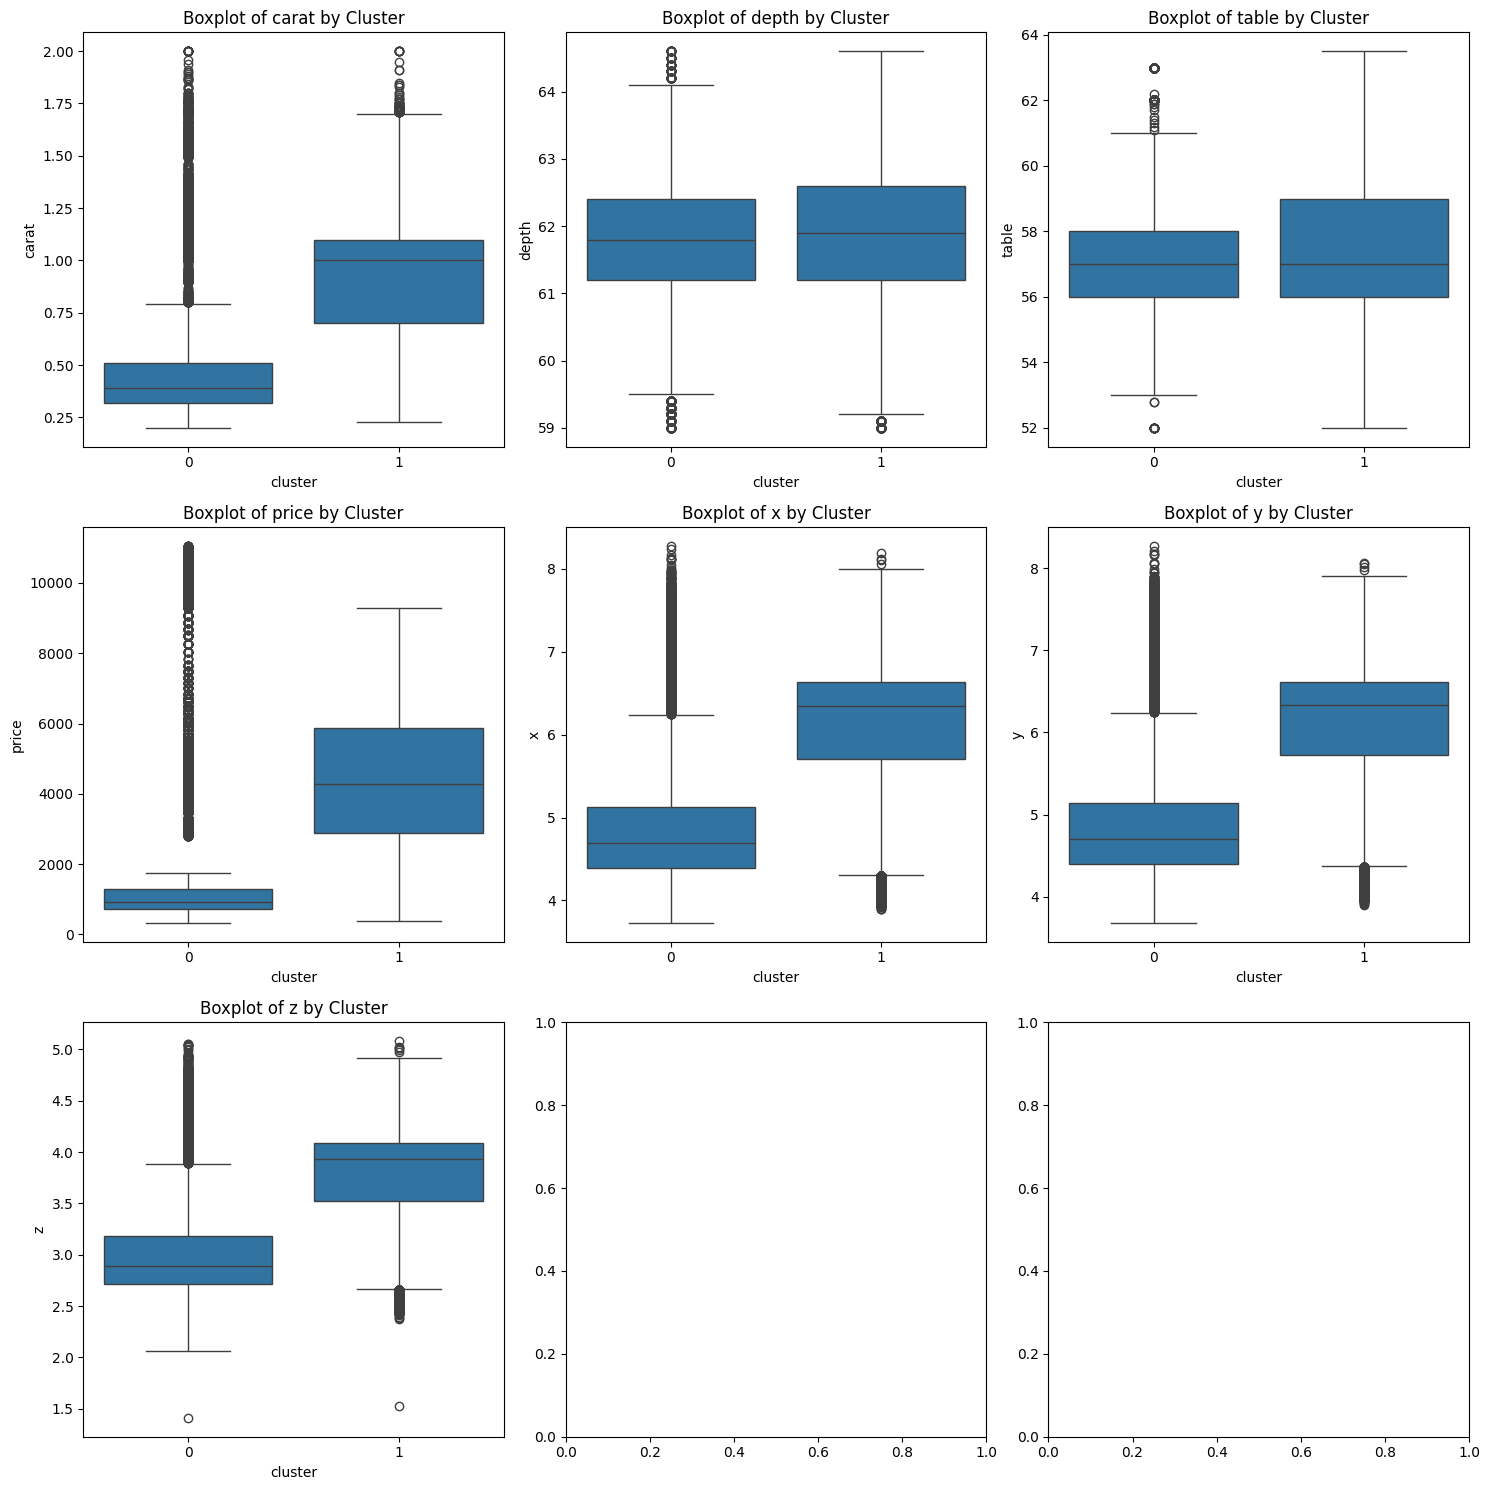

In [57]:
numerical_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, col in enumerate(numerical_cols):
    row = i // 3
    col_idx = i % 3
    sns.boxplot(x='cluster', y=col, data=df, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot of {col} by Cluster')

plt.tight_layout()
plt.show()

In [58]:
cluster_0 = df[df['cluster'] == 0]
Q1 = cluster_0['price'].quantile(0.25)
Q3 = cluster_0['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = cluster_0[(cluster_0['price'] < lower_bound) | (cluster_0['price'] > upper_bound)]

outlier_indices = outliers.index
df.loc[outlier_indices, 'cluster'] = 1

df

,carat,cut,color,clarity,depth,table,price,x,y,z,cluster_x,cluster_y,cluster
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,0
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46420,0.50,Ideal,E,VS2,60.8,57.0,1768,5.16,5.13,3.13,1,1,1
46421,0.66,Very Good,E,SI2,61.3,57.2,1769,5.59,5.66,3.45,1,1,1
46422,0.53,Ideal,G,VS2,61.6,57.0,1769,5.15,5.20,3.19,1,1,1
46423,0.51,Ideal,D,VS2,60.8,57.0,1769,5.18,5.21,3.16,1,1,1


In [59]:
df.describe()

,carat,depth,table,price,x,y,z,cluster_x,cluster_y,cluster
count,39509.000000,39509.000000,39509.000000,39509.000000,39509.000000,39509.000000,39509.000000,39509.000000,39509.000000,39509.000000
mean,0.712568,61.809431,57.248354,3167.566605,5.540026,5.544743,3.425589,0.503911,0.503911,0.588398
std,0.385753,1.073101,2.015019,2774.521048,1.024948,1.019116,0.634444,0.499991,0.499991,0.492130
min,0.200000,59.000000,52.000000,326.000000,3.730000,3.680000,1.410000,0.000000,0.000000,0.000000
25%,0.350000,61.200000,56.000000,842.000000,4.550000,4.550000,2.800000,0.000000,0.000000,0.000000
50%,0.560000,61.900000,57.000000,1668.000000,5.300000,5.320000,3.280000,1.000000,1.000000,1.000000
75%,1.020000,62.500000,59.000000,4953.000000,6.460000,6.460000,4.000000,1.000000,1.000000,1.000000
max,2.000000,64.600000,63.500000,11047.000000,8.270000,8.270000,5.080000,1.000000,1.000000,1.000000


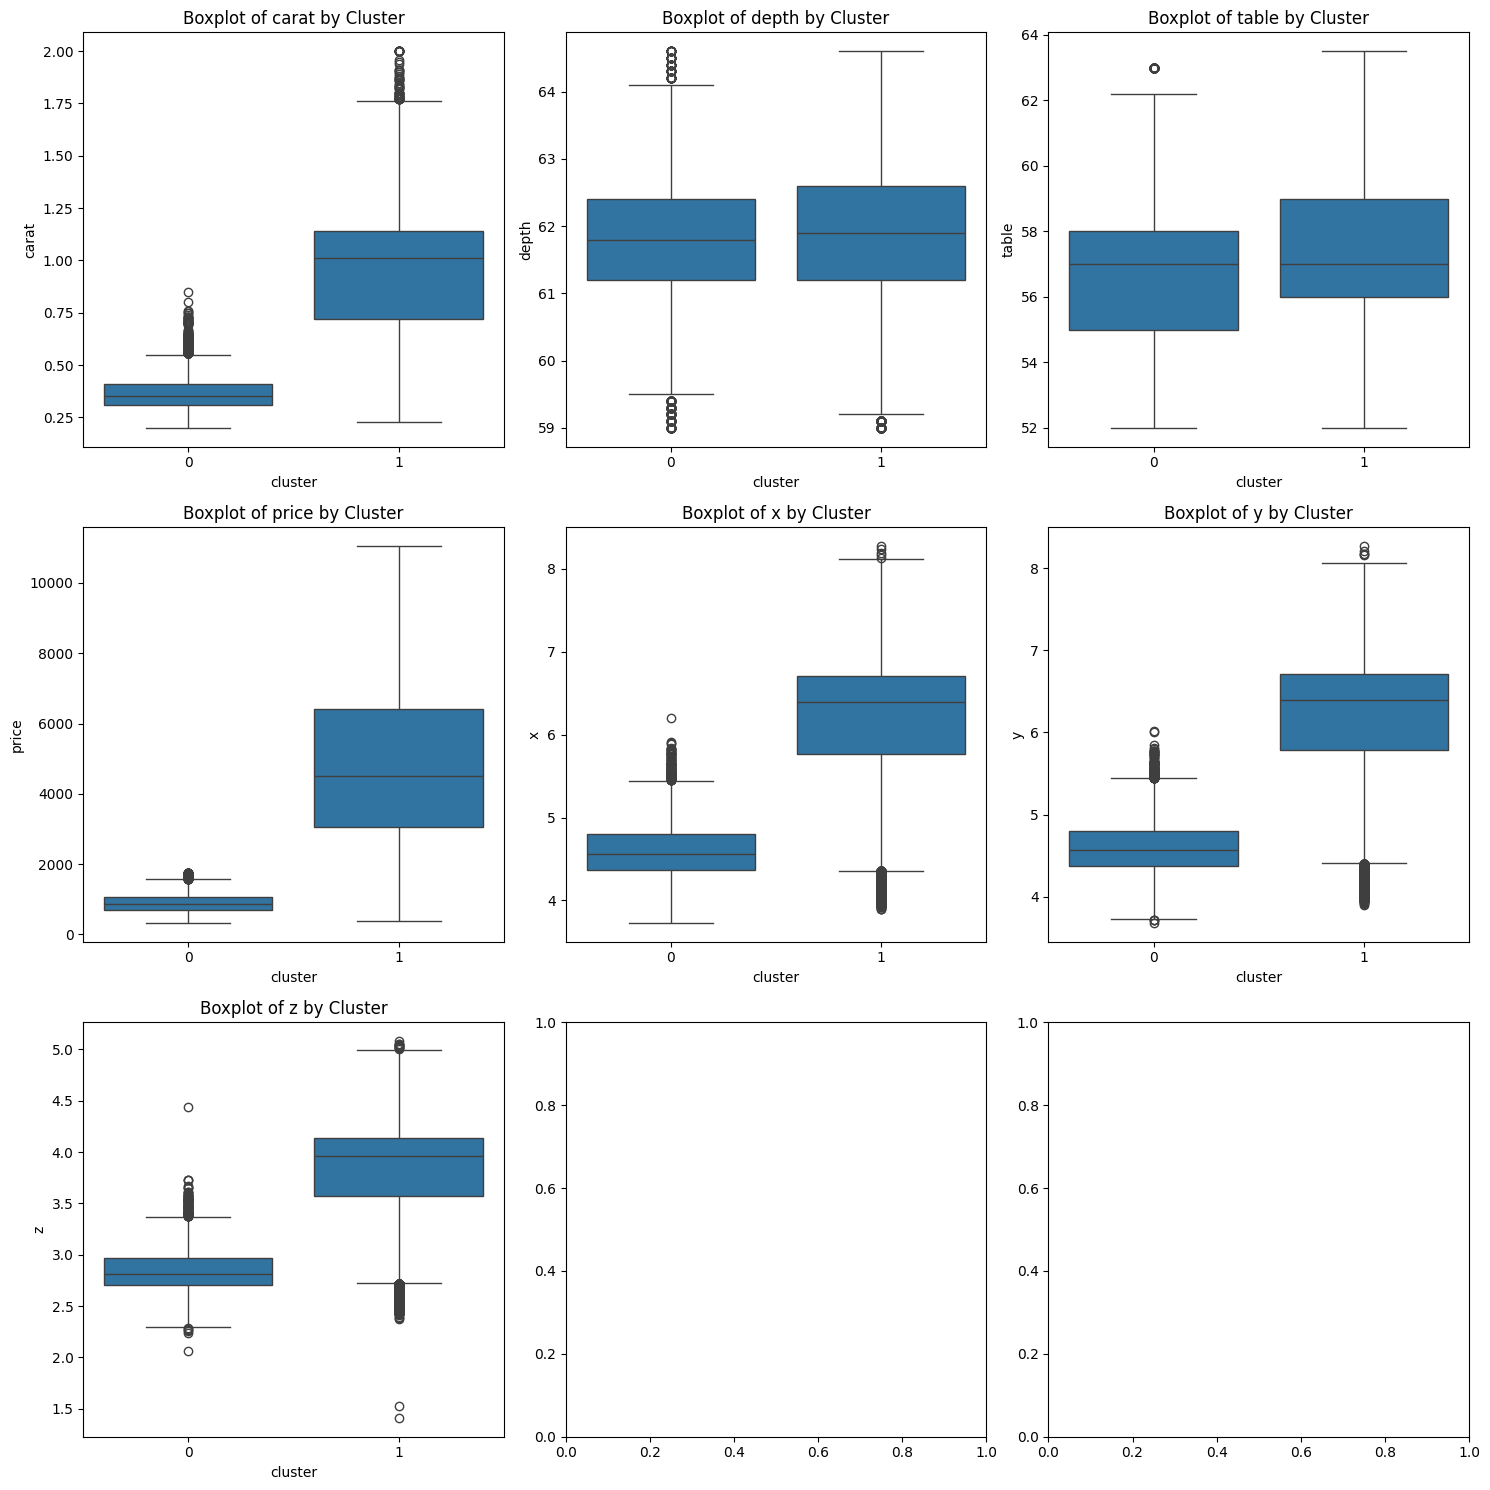

In [60]:
numerical_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, col in enumerate(numerical_cols):
    row = i // 3
    col_idx = i % 3
    sns.boxplot(x='cluster', y=col, data=df, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot of {col} by Cluster')

plt.tight_layout()
plt.savefig('cluster_visualization.png')
plt.show()

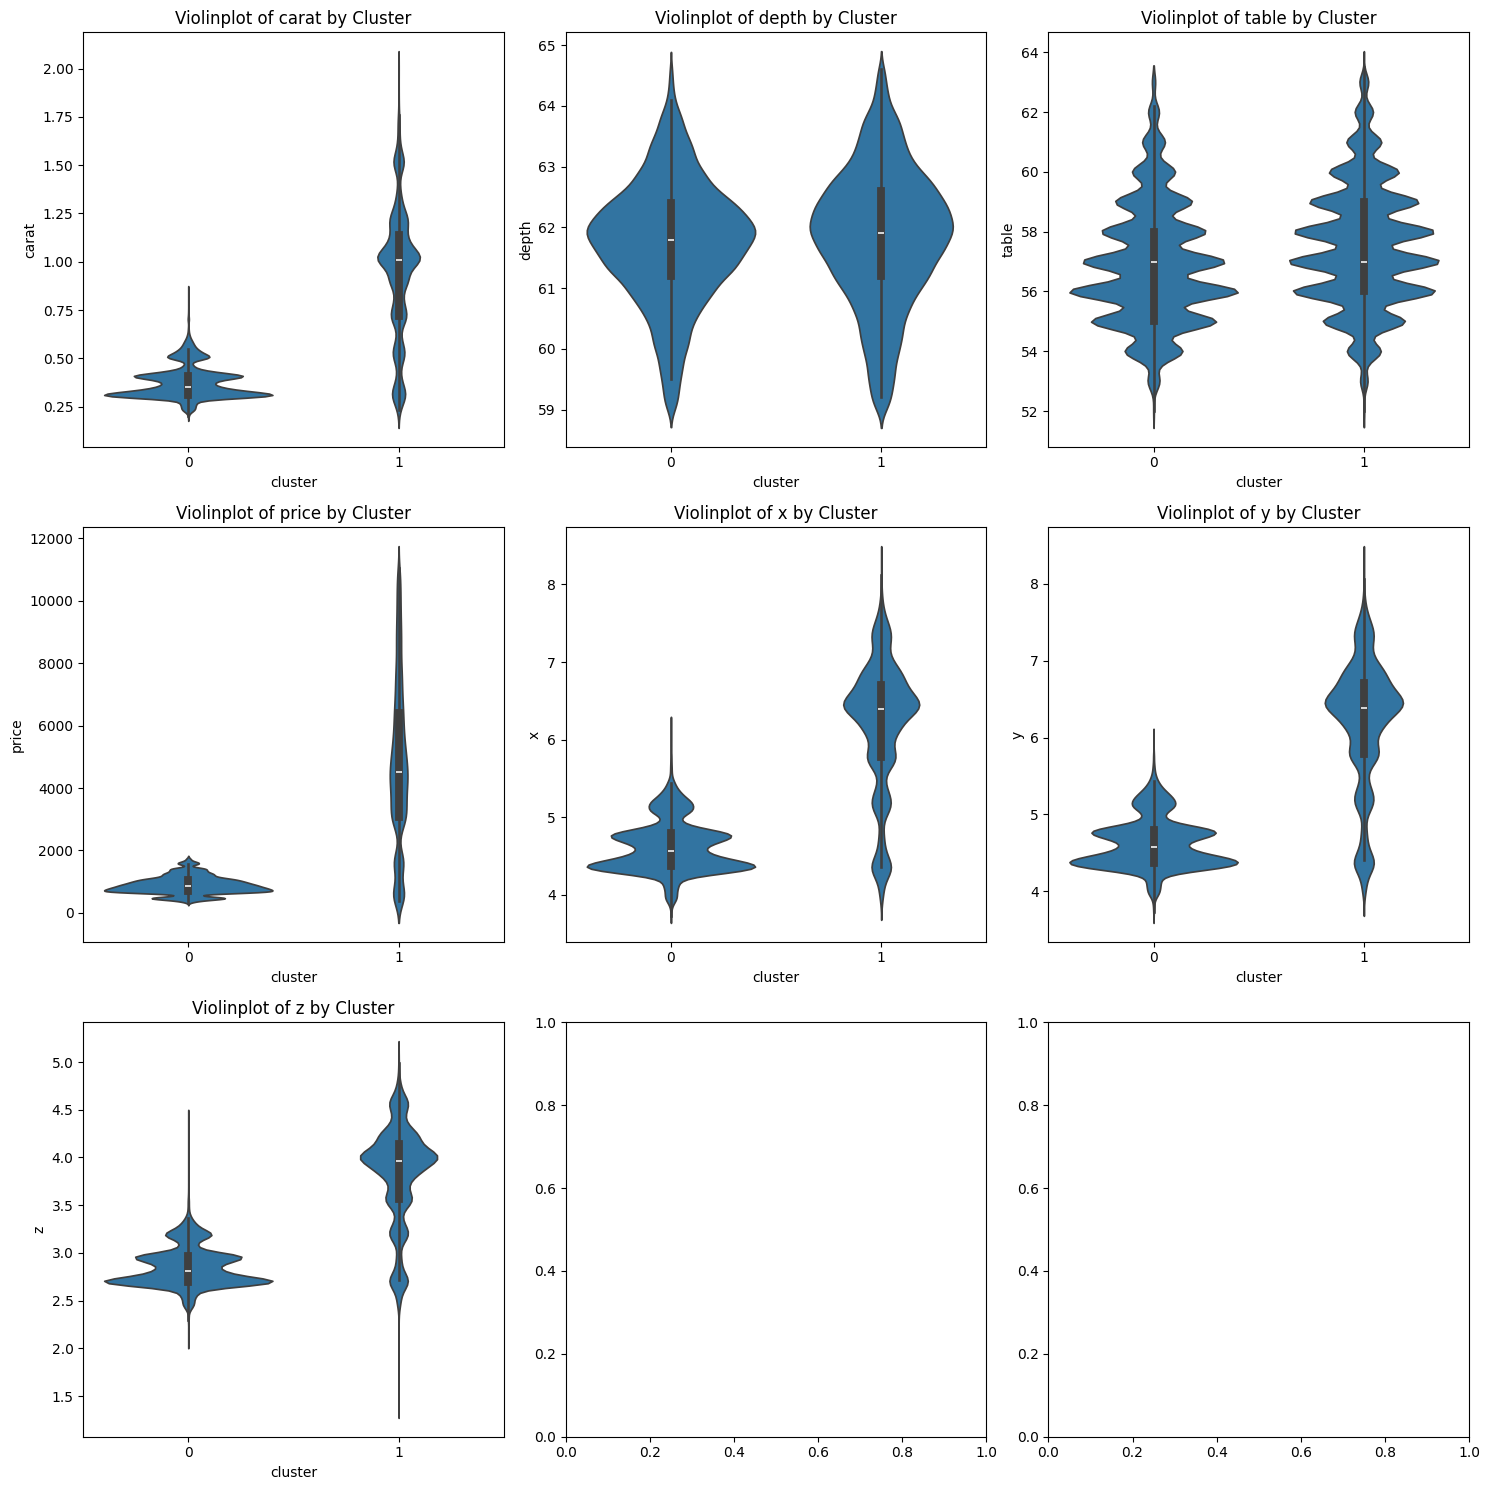

In [61]:
numer_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, col in enumerate(numer_cols):
    row = i // 3
    col_idx = i % 3
    sns.violinplot(x='cluster', y=col, data=df, ax=axes[row, col_idx]) # Changed to violinplot
    axes[row, col_idx].set_title(f'Violinplot of {col} by Cluster')

plt.tight_layout()
plt.savefig('violin_visualization.png')
plt.show()

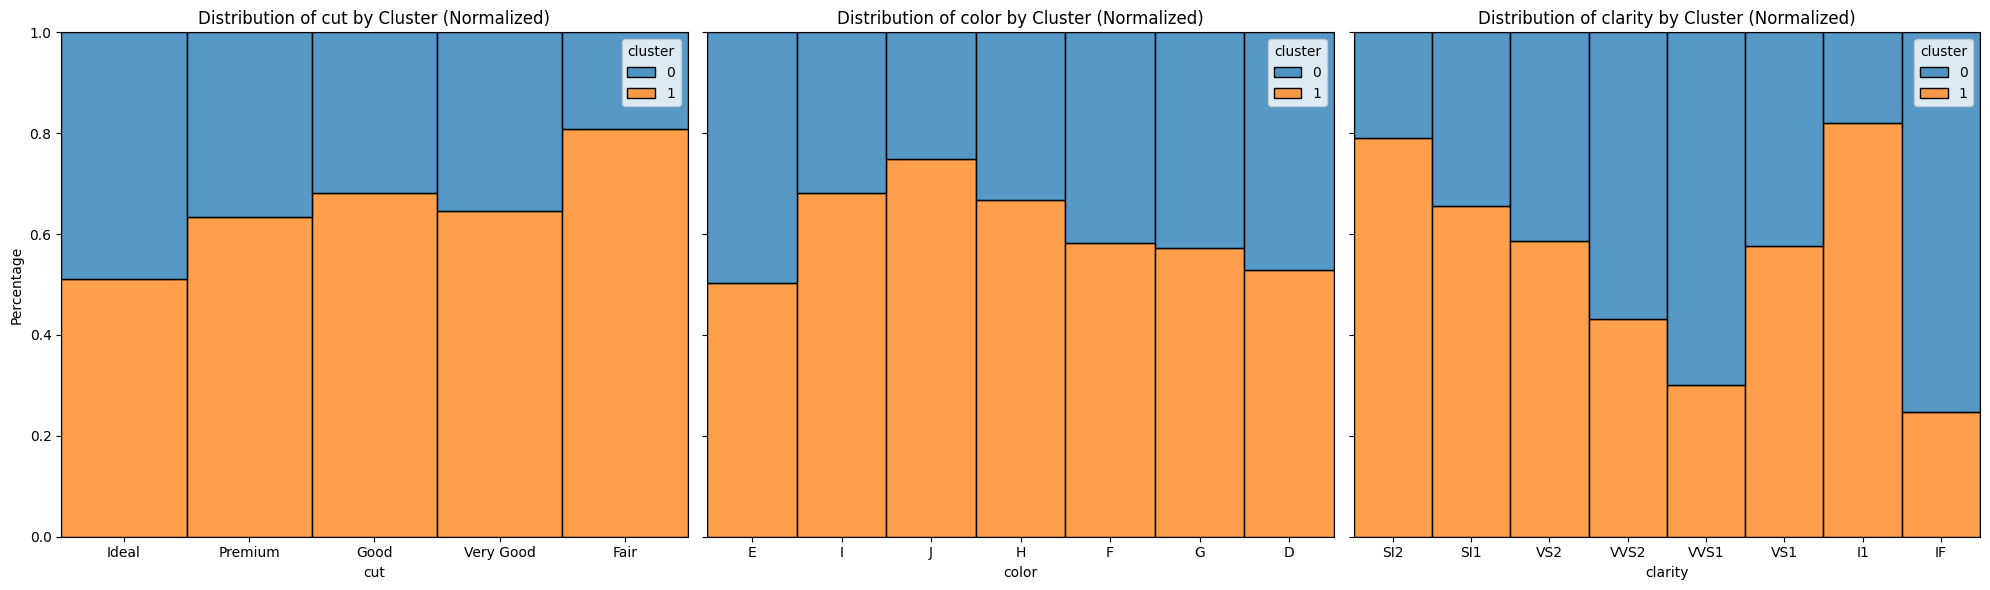

In [62]:
categorical_cols = ['cut', 'color', 'clarity']

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
for i, col in enumerate(categorical_cols):
    sns.histplot(
        data=df,
        x=col,
        hue='cluster',
        multiple='fill',
        stat='percent',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {col} by Cluster (Normalized)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Percentage' if i == 0 else '')

plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?



---

### **1. Penjelasan Distribusi Data dalam Setiap Cluster**
Dari boxplot dan violinplot, terlihat bahwa terdapat **dua cluster utama** (0 dan 1), dengan karakteristik distribusi berikut:

#### **Cluster 0**
- **Carat**: Nilai karat rata-rata lebih kecil, mayoritas berada di kisaran **0.25 - 0.6**, menunjukkan ukuran berlian kecil.
- **Price**: Sangat rendah dibandingkan Cluster 1, mayoritas berada di kisaran **500 - 2,500**.
- **Dimensi (x, y, z)**:
  - **x (panjang)**: Mayoritas berada di kisaran **4.0 - 5.5**, menunjukkan ukuran kecil.
  - **y (lebar)**: Distribusi mirip dengan x.
  - **z (tinggi)**: Rentang nilai **2.5 - 3.5**, menunjukkan tinggi yang kecil.

#### **Cluster 1**
- **Carat**: Nilai rata-rata jauh lebih besar, mayoritas di kisaran **1.0 - 2.0**, menunjukkan berlian besar.
- **Price**: Signifikan lebih tinggi, berkisar antara **3,000 - 10,000**, dengan beberapa outlier.
- **Dimensi (x, y, z)**:
  - **x (panjang)**: Nilai mayoritas di kisaran **6.0 - 8.0**, menunjukkan ukuran besar.
  - **y (lebar)**: Mirip dengan x.
  - **z (tinggi)**: Rentang di **3.5 - 4.5**, mencerminkan dimensi yang lebih proporsional.

---

### **2. Wawasan dan Insight yang Ditemukan**
Dari clustering ini, beberapa pola penting dapat diidentifikasi:

#### **Pola Utama**
1. **Cluster 0: Low-End Diamonds**
   - Berlian dengan spesifikasi kecil (karat, dimensi) dan harga rendah.
   - Cocok untuk pasar **ekonomis** atau pelanggan dengan anggaran terbatas.

2. **Cluster 1: Premium Diamonds**
   - Berlian dengan ukuran besar (karat, dimensi) dan harga tinggi.
   - Cocok untuk pasar **high-end** yang mencari kualitas dan estetika premium.

#### **Pola Tambahan**
- Fitur **Depth** dan **Table** cenderung kurang signifikan dalam membedakan cluster, sehingga fokus analisis lebih pada **Carat**, **Price**, dan dimensi (x, y, z).
- **Outlier** pada harga di Cluster 1 menunjukkan kemungkinan adanya berlian dengan harga sangat tinggi karena faktor tambahan (misalnya, kejernihan atau warna).

---

### **3. Rekomendasi Strategi dan Analisis Lanjut**
Berikut strategi berdasarkan hasil analisis cluster:


**1. Strategi untuk Cluster 0 (Low-End Diamonds)**
- **Target Pasar**: Segmen ekonomis, seperti pembeli pertama atau pasangan muda dengan anggaran terbatas.
- **Produk**:
  - Cincin kawin sederhana atau berlian kecil untuk perhiasan sehari-hari.
  - Fokus pada desain minimalis dan harga terjangkau.
- **Pemasaran**:
  - Promosikan sebagai opsi hemat biaya tanpa mengorbankan estetika.
  - Gunakan saluran pemasaran massal seperti media sosial dengan fokus pada diskon dan promosi.
- **Penempatan Produk**:
  - Distribusikan ke toko-toko ritel umum, online marketplace, dan jaringan grosir.
  - Berkolaborasi dengan platform e-commerce untuk memberikan opsi pembayaran cicilan.

---

**2. Strategi untuk Cluster 1 (Premium Diamonds)**
- **Target Pasar**: Segmen premium, seperti pasangan yang merayakan acara khusus atau kolektor berlian.
- **Produk**:
  - Berlian besar dengan desain mewah untuk acara formal atau koleksi eksklusif.
  - Berikan opsi personalisasi, seperti ukiran khusus atau desain custom.
- **Pemasaran**:
  - Promosikan melalui kampanye eksklusif, seperti iklan di majalah high-end atau acara pameran perhiasan.
  - Tawarkan sertifikat keaslian dan layanan premium, seperti konsultasi pribadi dan layanan pasca-pembelian.
- **Penempatan Produk**:
  - Fokus pada butik mewah, pameran eksklusif, atau situs web premium.
  - Gunakan saluran distribusi dengan brand positioning yang tinggi.

---

**3. Rekomendasi Tambahan**
1. **Pengoptimalan Harga**:
   - Untuk **Cluster 0**, pastikan harga tetap kompetitif untuk menarik lebih banyak pelanggan.
   - Untuk **Cluster 1**, tambahkan layanan eksklusif untuk menciptakan nilai tambah yang sebanding dengan harga tinggi.
   
2. **Penyesuaian Branding**:
   - Untuk **Cluster 0**, bangun branding sebagai merek yang terjangkau tetapi tetap modis.
   - Untuk **Cluster 1**, fokuskan branding pada keunggulan kualitas, keunikan, dan kesan prestisius.

3. **Layanan Pelanggan**:
   - Untuk **Cluster 0**, tawarkan layanan sederhana seperti pengiriman cepat dan kebijakan pengembalian fleksibel.
   - Untuk **Cluster 1**, berikan layanan istimewa, seperti layanan concierge atau konsultasi langsung dengan ahli berlian.

4. **Kolaborasi dan Promosi**:
   - Bermitra dengan platform e-commerce untuk **Cluster 0**.
   - Berkolaborasi dengan desainer terkenal atau event pernikahan untuk **Cluster 1**.

---


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df.to_csv('clustered_diamonds.csv', index=False)